In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [2]:
test = pd.read_csv('F:/Python/DS_takehome_challenges/data_challenge_data/data_challenge_data/test_table.csv')
user = pd.read_csv('F:/Python/DS_takehome_challenges/data_challenge_data/data_challenge_data/user_table.csv')

In [3]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [4]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [5]:
df = pd.merge(test, user, how='left', on='user_id')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [7]:
df.sample(5)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
141760,791904,2015-11-30,Ads,Mobile,EN,Google,Android_App,0,1,M,21.0,Colombia
285965,363916,2015-11-30,Ads,Mobile,ES,Yahoo,Android_App,0,0,M,30.0,Mexico
409326,261143,2015-12-02,Ads,Mobile,ES,Google,Iphone_App,0,0,M,27.0,Mexico
86651,785280,2015-12-01,Ads,Web,ES,Google,IE,0,0,M,19.0,Spain
230704,455988,2015-12-02,Direct,Web,ES,NaN,Chrome,0,0,M,26.0,Spain


### Dealing Missing Values

In [8]:
df.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

First fill NaN in ads_channel with NA (No Ads)

In [9]:
df['ads_channel'] = df['ads_channel'].fillna('NA')

Looks like sex, age and country have same amount of missing value. but we need to confirm that.

In [10]:
df[df['sex'].isnull()].sample(5)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
7552,728692,2015-12-03,SEO,Web,ES,NA,Safari,0,0,NaN,NaN,NaN
316473,203802,2015-12-01,SEO,Web,ES,NA,Chrome,0,1,NaN,NaN,NaN
110395,721814,2015-12-03,Ads,Mobile,ES,Google,Android_App,0,1,NaN,NaN,NaN
395343,218260,2015-12-02,SEO,Web,ES,NA,FireFox,0,0,NaN,NaN,NaN
371640,127935,2015-12-04,Direct,Web,EN,NA,IE,0,0,NaN,NaN,NaN


We can drop rows with missing sex, age and country

In [11]:
df.dropna(inplace=True)
df.sample(5)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
359775,125269,2015-12-04,Direct,Web,ES,NA,Chrome,1,1,F,23.0,Mexico
365984,665515,2015-12-02,Ads,Web,ES,Facebook,IE,0,1,M,29.0,El Salvador
219107,478371,2015-12-03,SEO,Web,ES,NA,Chrome,0,0,M,20.0,Argentina
368122,283607,2015-12-04,SEO,Web,ES,NA,Chrome,0,1,M,28.0,Costa Rica
328915,982423,2015-12-03,SEO,Web,ES,NA,Chrome,0,1,F,29.0,Guatemala


In [12]:
df.isnull().sum()

user_id             0
date                0
source              0
device              0
browser_language    0
ads_channel         0
browser             0
conversion          0
test                0
sex                 0
age                 0
country             0
dtype: int64

In [13]:
df.shape

(452867, 12)

## Number of test and control group

In [14]:
df['test'].value_counts()

0    237093
1    215774
Name: test, dtype: int64

## A/B Test

Before checking test results, let's confirm it is true that Conversion Rate in Spain is better than other LatAm countries

In [15]:
grouped_country = df[df['test']==0][['conversion', 'country']].groupby('country').mean()
grouped_country = grouped_country.reset_index()
grouped_country = grouped_country.sort_values('conversion', ascending=False)

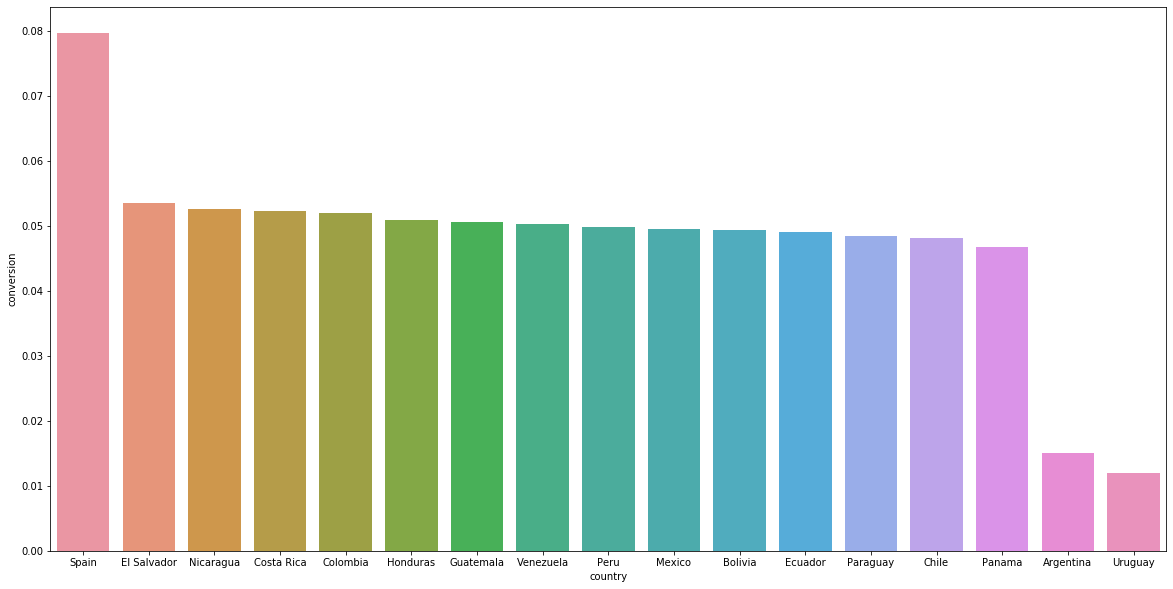

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x='country', y='conversion', data=grouped_country)
plt.show()

Looks like Spain does have a higher conversion rate than other LatAm countries

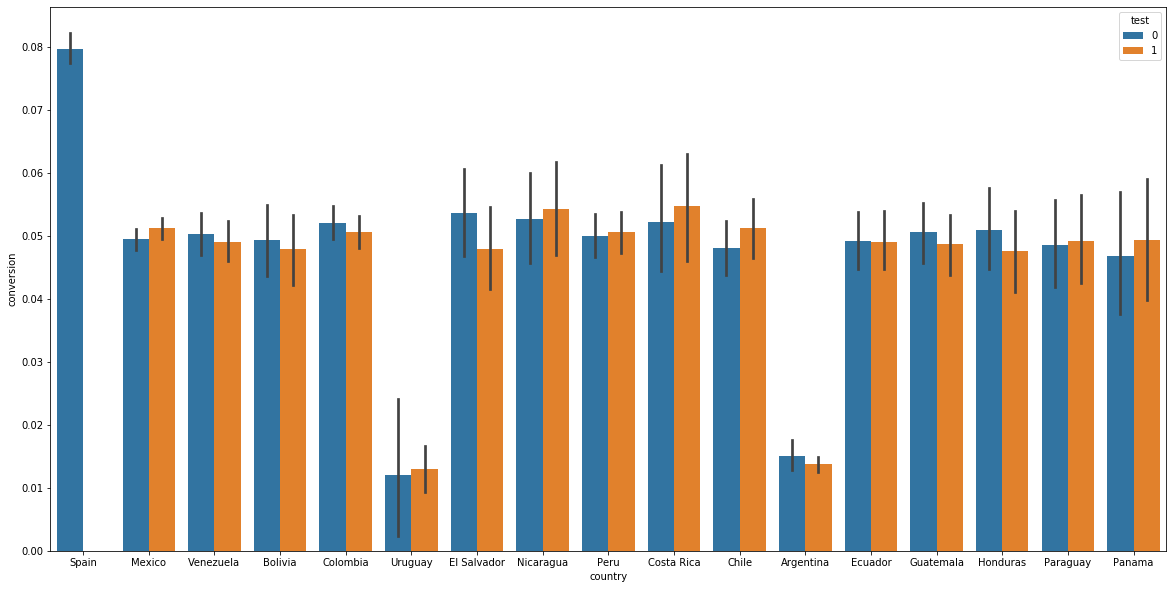

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x='country', y='conversion', hue='test', data=df)
plt.show()

Nothing chagnes in Spain, therefore it can be exculded in A/B Test.

In [18]:
test_df = df[df['country']!='Spain']
test_group = test_df[test_df['test']==1]['conversion'].values
control_group = test_df[test_df['test']==0]['conversion'].values

In [19]:
print('Average conversion rate in test group is : '+str(round(test_group.mean(),4)))
print('Average conversion rate in control group is : '+str(round(control_group.mean(),4)))

Average conversion rate in test group is : 0.0434
Average conversion rate in control group is : 0.0483


In [20]:
from scipy.stats import ttest_ind
print(ttest_ind(test_group, control_group, equal_var=False))

Ttest_indResult(statistic=-7.353895203080277, pvalue=1.9289178577799033e-13)


We can conclude that there is a significant differenct between Spain-translated and local-translated product.

## Analysis

In [21]:
ratio = test_df[test_df['test']==1].groupby('date').mean()['conversion']/test_df[test_df['test']==0].groupby('date').mean()['conversion']

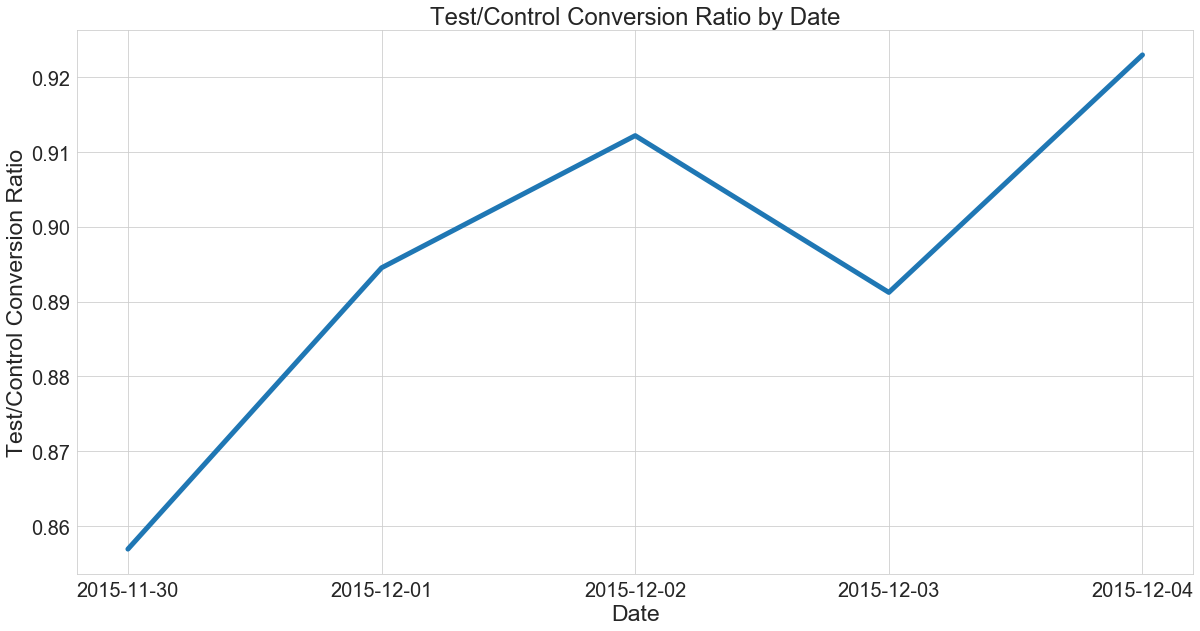

In [22]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.plot(ratio,linewidth=5.0)
plt.title('Test/Control Conversion Ratio by Date',fontsize=24)
plt.xlabel('Date',fontsize=23)
plt.ylabel('Test/Control Conversion Ratio',fontsize=23)
plt.show()

Conclusion:
- Test group performed consistantly worse than control group
- The test only ran for 5 days, we can see the test group performed better started on day 4

To prove if the test was valid we can check
- Sample size
- Sample Bias